In [41]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
features_path = "acsincome_ca_features.csv"
label_path = "acsincome_ca_labels.csv"

X = pd.read_csv("acsincome_ca_features.csv")
y = pd.read_csv("acsincome_ca_labels.csv")
X.head()

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P
0,30.0,6.0,14.0,1.0,9610.0,6.0,16.0,40.0,1.0,8.0
1,21.0,4.0,16.0,5.0,1970.0,6.0,17.0,20.0,1.0,1.0
2,65.0,2.0,22.0,5.0,2040.0,6.0,17.0,8.0,1.0,1.0
3,33.0,1.0,14.0,3.0,9610.0,36.0,16.0,40.0,1.0,1.0
4,18.0,2.0,19.0,5.0,1021.0,6.0,17.0,18.0,2.0,1.0


In [3]:
X, y = shuffle(X, y, random_state=1)

# only use the first N samples to limit training time
num_samples = int(len(X)*0.1)
X, y = X[:num_samples], y[:num_samples]
print(X.shape)

(19566, 10)


In [4]:
# Standrize the data
scaler = StandardScaler()
scaler.fit_transform(X)
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [5]:
print("\n************* SVM ********************\n")
param_grid_SVC = {
    'C': [0.1, 1, 10, 50, 100],
    'kernel': ['rbf']
}
model_svm = SVR()
grid_search_SVC = GridSearchCV(estimator=model_svm, param_grid=param_grid_SVC, scoring='accuracy', cv=5)
grid_search_SVC.fit(X_train,y_train)
best_SVM_model = grid_search_SVC.best_estimator_
print("best hyper-parameters SVM : ", grid_search_SVC.best_params_)


************* SVM ********************

best hyper-parameters SVM :  {'C': 0.1, 'kernel': 'rbf'}


In [6]:
print("\n************* Random Forest ********************\n")
param_grid_randomF = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
model_randomF = RandomForestClassifier()
grid_search_randomF = GridSearchCV(estimator=model_randomF, param_grid=param_grid_randomF, scoring='accuracy', cv=5)
grid_search_randomF.fit(X_train,y_train)
best_randomF_model = grid_search_randomF.best_estimator_
print("best hyper-parameters Random Forest : ", grid_search_randomF.best_params_)


************* Random Forest ********************

best hyper-parameters Random Forest :  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [7]:
print("\n************* Ada Boost ********************\n")
param_grid_adaboost = {
    'n_estimators': [50, 100, 200],                   
    'learning_rate': [0.01, 0.1, 1.0, 2.0]
    }
model_adaBoost = AdaBoostClassifier()
grid_search_adaBoost = GridSearchCV(estimator=model_adaBoost, param_grid=param_grid_adaboost, scoring='accuracy', cv=5)
grid_search_adaBoost.fit(X_train,y_train)
best_adaBoost_model = grid_search_adaBoost.best_estimator_
print("best hyper-parameters AdaBoost : ", grid_search_adaBoost.best_params_)


************* Ada Boost ********************

best hyper-parameters AdaBoost :  {'learning_rate': 1.0, 'n_estimators': 200}


In [8]:
print("\n************* Gradient Boosting ********************\n")
param_grid_gradientboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7]
    }
model_GradientBoosting = GradientBoostingClassifier()
grid_search_gradientboost = GridSearchCV(estimator=model_GradientBoosting, param_grid=param_grid_gradientboost, scoring='accuracy', cv=5)
grid_search_gradientboost.fit(X_train,y_train)
best_GradientBoost_model = grid_search_gradientboost.best_estimator_
print("best hyper-parameters Gradient Boosting : ", grid_search_gradientboost.best_params_)


************* Gradient Boosting ********************

best hyper-parameters Gradient Boosting :  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [9]:
print("SVM \n",cross_val_score(best_SVM_model, X_train,y_train,cv=5).mean())
print("Random Forest \n",cross_val_score(best_randomF_model, X_train,y_train,cv=5).mean())
print("Ada Boost \n",cross_val_score(best_adaBoost_model, X_train,y_train,cv=5).mean())
print("Gradient Boosting \n",cross_val_score(best_GradientBoost_model, X_train,y_train,cv=5).mean())

SVM 
 0.07042661620587702
Random Forest 
 0.8088425851757597
Ada Boost 
 0.8132511431087457
Gradient Boosting 
 0.8163817049539646


In [53]:
def plot_confusion_matrix(cm, classifier) :
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [False, True])
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

Accuracy score - SVM :  0.698773633111906
Classification report - SVM :
                precision    recall  f1-score   support

       False       0.70      0.83      0.76      2257
        True       0.69      0.52      0.59      1657

    accuracy                           0.70      3914
   macro avg       0.70      0.68      0.68      3914
weighted avg       0.70      0.70      0.69      3914

Confusion matrix - SVM : 


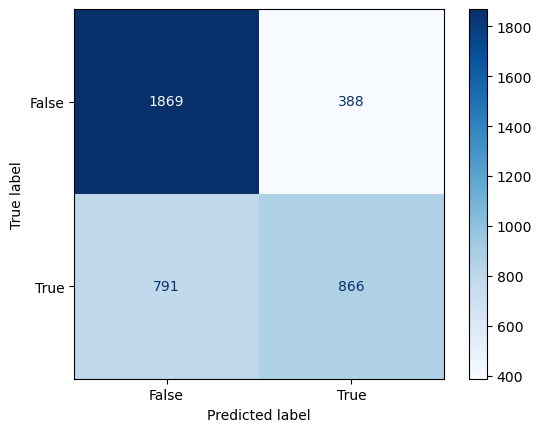

In [54]:
y_pred_svm = best_SVM_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm.round())
class_report_svm = classification_report(y_test, y_pred_svm.round())
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm.round())

print("Accuracy score - SVM : ", accuracy_svm)
print("Classification report - SVM :\n ", class_report_svm)
print("Confusion matrix - SVM : ")
plot_confusion_matrix(conf_matrix_svm, best_SVM_model)

Accuracy score - Random Forest :  0.812212570260603
Classification report - Random Forest :
                precision    recall  f1-score   support

       False       0.83      0.85      0.84      2257
        True       0.79      0.76      0.77      1657

    accuracy                           0.81      3914
   macro avg       0.81      0.81      0.81      3914
weighted avg       0.81      0.81      0.81      3914

Confusion matrix - Random Forest : 


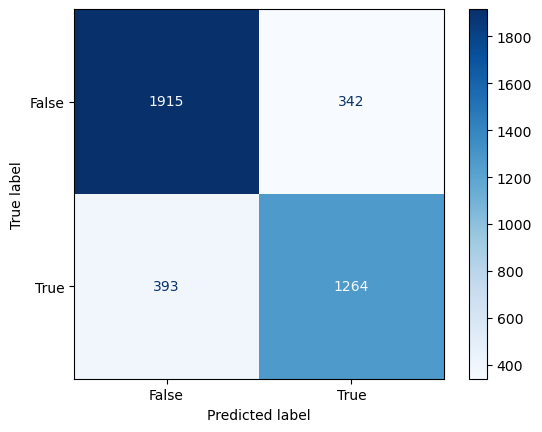

In [56]:
y_pred_randomF = best_randomF_model.predict(X_test)
accuracy_randomF = accuracy_score(y_test, y_pred_randomF.round())
class_report_randomF = classification_report(y_test, y_pred_randomF.round())
conf_matrix_randomF = confusion_matrix(y_test, y_pred_randomF.round())

print("Accuracy score - Random Forest : ", accuracy_randomF)
print("Classification report - Random Forest :\n ", class_report_randomF)
print("Confusion matrix - Random Forest : ")
plot_confusion_matrix(conf_matrix_randomF, best_randomF_model)

Accuracy score - Ada Boost :  0.8160449667858968
Classification report - Ada Boost :
                precision    recall  f1-score   support

       False       0.83      0.86      0.84      2257
        True       0.79      0.76      0.78      1657

    accuracy                           0.82      3914
   macro avg       0.81      0.81      0.81      3914
weighted avg       0.82      0.82      0.82      3914

Confusion matrix - Ada Boost : 


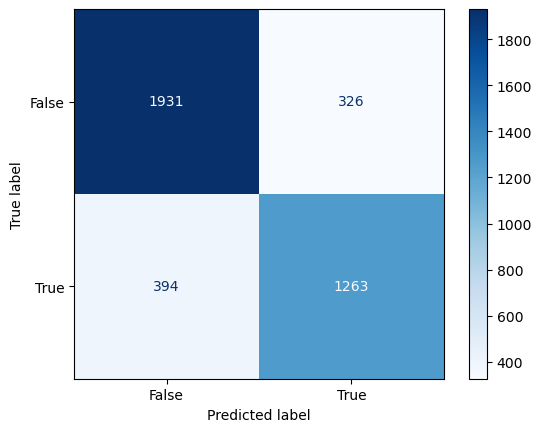

In [57]:
y_pred_adaBoost = best_adaBoost_model.predict(X_test)
accuracy_adaBoost = accuracy_score(y_test, y_pred_adaBoost)
class_report_adaBoost = classification_report(y_test, y_pred_adaBoost)
conf_matrix_adaBoost = confusion_matrix(y_test, y_pred_adaBoost)

print("Accuracy score - Ada Boost : ", accuracy_adaBoost)
print("Classification report - Ada Boost :\n ", class_report_adaBoost)
print("Confusion matrix - Ada Boost : ")
plot_confusion_matrix(conf_matrix_adaBoost, best_adaBoost_model)

Accuracy score - Gradient Boosting :  0.8249872253449156
Classification report - Gradient Boosting :
                precision    recall  f1-score   support

       False       0.84      0.86      0.85      2257
        True       0.80      0.78      0.79      1657

    accuracy                           0.82      3914
   macro avg       0.82      0.82      0.82      3914
weighted avg       0.82      0.82      0.82      3914

Confusion matrix - Gradient Boosting : 


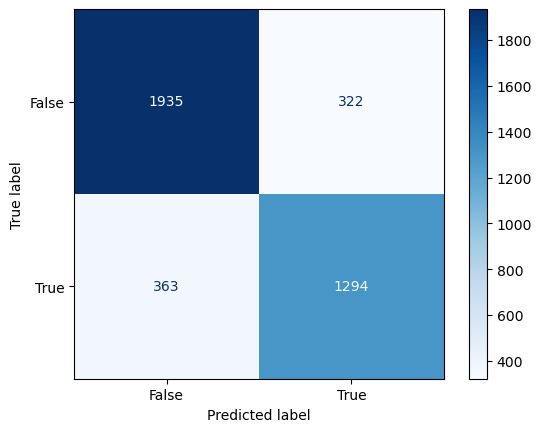

In [58]:
y_pred_GradientBoost = best_GradientBoost_model.predict(X_test)
accuracy_GradientBoost = accuracy_score(y_test, y_pred_GradientBoost)
class_report_GradientBoost = classification_report(y_test, y_pred_GradientBoost)
conf_matrix_GradientBoost = confusion_matrix(y_test, y_pred_GradientBoost)


print("Accuracy score - Gradient Boosting : ", accuracy_GradientBoost)
print("Classification report - Gradient Boosting :\n ", class_report_GradientBoost)
print("Confusion matrix - Gradient Boosting : ")
plot_confusion_matrix(conf_matrix_GradientBoost, best_GradientBoost_model)

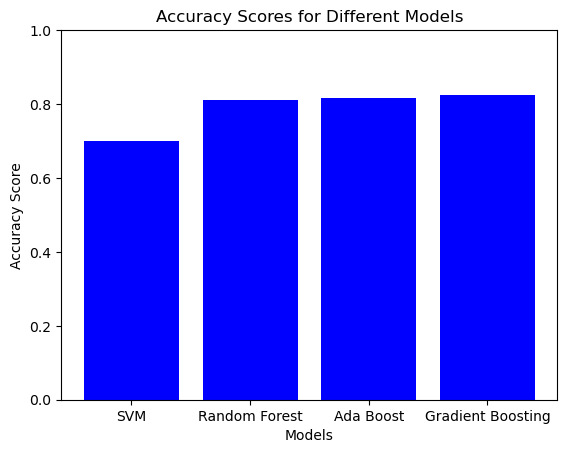

In [64]:
models = ['SVM', 'Random Forest', 'Ada Boost', 'Gradient Boosting']
accuracy_scores = [accuracy_svm, accuracy_randomF, accuracy_adaBoost, accuracy_GradientBoost]

plt.bar(models, accuracy_scores, color='blue')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Different Models')
plt.ylim(0, 1)  
plt.show()

In [24]:
# Colorado
X_co = pd.read_csv("acsincome_co_allfeaturesTP2.csv")
y_co = pd.read_csv("acsincome_co_labelTP2.csv")

X_ne, y_co = shuffle(X_co, y_co, random_state=1)

# only use the first N samples to limit training time
num_samples_ = int(len(X_co)*0.1)
X_co, y_co = X_co[:num_samples], y_co[:num_samples]

# Standrize the data
scaler_co = StandardScaler()
scaler_co.fit_transform(X_co)

X_co.head()


,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P
0,19.0,2.0,19.0,5.0,2850.0,6.0,17.0,2.0,2.0,9.0
1,24.0,5.0,18.0,5.0,9645.0,13.0,17.0,40.0,1.0,2.0
2,22.0,1.0,19.0,5.0,1520.0,53.0,17.0,45.0,2.0,1.0
3,32.0,1.0,16.0,1.0,4055.0,8.0,16.0,40.0,2.0,1.0
4,19.0,2.0,19.0,5.0,2006.0,34.0,17.0,9.0,2.0,1.0


In [59]:
################# SVM ##################################################################################################
y_pred_SVM = best_SVM_model.predict(X_co)
accuracy_SVM = accuracy_score(y_co, y_pred_SVM.round())
class_report_SVM = classification_report(y_co, y_pred_SVM.round())
conf_matrix_SVM = confusion_matrix(y_co, y_pred_SVM.round())

print("Accuracy score - SVM : ", accuracy_SVM)
print("Classification report - SVM :\n ", class_report_SVM)
print("Confusion matrix - SVM :\n ", conf_matrix_SVM)

Accuracy score - SVM :  0.5315854032505366
Classification report - SVM :
                precision    recall  f1-score   support

           0       0.59      0.65      0.62     11480
           1       0.42      0.36      0.39      8086

    accuracy                           0.53     19566
   macro avg       0.51      0.51      0.50     19566
weighted avg       0.52      0.53      0.52     19566

Confusion matrix - SVM :
  [[7471 4009]
 [5156 2930]]


In [26]:
################ Random Forest #########################################################################################
y_pred_randomF = best_randomF_model.predict(X_co)
accuracy_randomF = accuracy_score(y_co, y_pred_randomF.round())
class_report_randomF = classification_report(y_co, y_pred_randomF.round())
conf_matrix_randomF = confusion_matrix(y_co, y_pred_randomF.round())

print("Accuracy score - Random Forest : ", accuracy_randomF)
print("Classification report - Random Forest :\n ", class_report_randomF)
print("Confusion matrix - Random Forest :\n ", conf_matrix_randomF)

Accuracy score - Random Forest :  0.5053664520085863
Classification report - Random Forest :
                precision    recall  f1-score   support

           0       0.59      0.51      0.55     11480
           1       0.42      0.49      0.45      8086

    accuracy                           0.51     19566
   macro avg       0.50      0.50      0.50     19566
weighted avg       0.52      0.51      0.51     19566

Confusion matrix - Random Forest :
  [[5908 5572]
 [4106 3980]]


In [27]:
################ Ada Boost #############################################################################################
y_pred_adaBoost = best_adaBoost_model.predict(X_co)
accuracy_adaBoost = accuracy_score(y_co, y_pred_adaBoost.round())
class_report_adaBoost = classification_report(y_co, y_pred_adaBoost.round())
conf_matrix_adaBoost = confusion_matrix(y_co, y_pred_adaBoost.round())

print("Accuracy score - Ada Boost : ", accuracy_adaBoost)
print("Classification report - Ada Boost :\n ", class_report_adaBoost)
print("Confusion matrix - Ada Boost :\n ", conf_matrix_adaBoost)

Accuracy score - Ada Boost :  0.5022487989369314
Classification report - Ada Boost :
                precision    recall  f1-score   support

           0       0.59      0.50      0.54     11480
           1       0.42      0.51      0.46      8086

    accuracy                           0.50     19566
   macro avg       0.50      0.50      0.50     19566
weighted avg       0.52      0.50      0.51     19566

Confusion matrix - Ada Boost :
  [[5737 5743]
 [3996 4090]]


In [28]:
################ Gradient Boost #########################################################################################
y_pred_Gradient_Boost = best_GradientBoost_model.predict(X_co)
accuracy_Gradient_Boost = accuracy_score(y_co, y_pred_Gradient_Boost.round())
class_report_Gradient_Boost = classification_report(y_co, y_pred_Gradient_Boost.round())
conf_matrix_Gradient_Boost = confusion_matrix(y_co, y_pred_Gradient_Boost.round())

print("Accuracy score - Gradient Boosting : ", accuracy_Gradient_Boost)
print("Classification report - Gradient Boosting :\n ", class_report_Gradient_Boost)
print("Confusion matrix - Gradient Boosting :\n ", conf_matrix_Gradient_Boost)

Accuracy score - Gradient Boosting :  0.5033220893386486
Classification report - Gradient Boosting :
                precision    recall  f1-score   support

           0       0.59      0.51      0.54     11480
           1       0.42      0.50      0.45      8086

    accuracy                           0.50     19566
   macro avg       0.50      0.50      0.50     19566
weighted avg       0.52      0.50      0.51     19566

Confusion matrix - Gradient Boosting :
  [[5814 5666]
 [4052 4034]]


In [29]:
# Nevada

X_ne = pd.read_csv("acsincome_ne_allfeaturesTP2.csv")
y_ne = pd.read_csv("acsincome_ne_labelTP2.csv")

X_ne, y_ne = shuffle(X_ne, y_ne, random_state=1)

# only use the first N samples to limit training time
num_samples_ = int(len(X_ne)*0.1)
X_ne, y_ne = X_ne[:num_samples], y_ne[:num_samples]

# Standrize the data
scaler_ne = StandardScaler()
scaler_ne.fit_transform(X_ne)

X_ne.head()

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P
5051,57.0,1.0,16.0,1.0,7810.0,303.0,0.0,40.0,1.0,1.0
9180,39.0,1.0,21.0,1.0,4600.0,19.0,0.0,35.0,2.0,1.0
5547,59.0,1.0,20.0,1.0,2300.0,19.0,0.0,40.0,2.0,1.0
9040,47.0,3.0,16.0,3.0,9620.0,31.0,0.0,35.0,1.0,1.0
6025,36.0,4.0,18.0,5.0,3802.0,31.0,15.0,50.0,1.0,1.0


In [30]:
################# SVM ##################################################################################################
y_pred_SVM = best_SVM_model.predict(X_ne)
accuracy_SVM = accuracy_score(y_ne, y_pred_SVM.round())
class_report_SVM = classification_report(y_ne, y_pred_SVM.round())
conf_matrix_SVM = confusion_matrix(y_ne, y_pred_SVM.round())

print("Accuracy score - SVM : ", accuracy_SVM)
print("Classification report - SVM :\n ", class_report_SVM)
print("Confusion matrix - SVM :\n ", conf_matrix_SVM)

Accuracy score - SVM :  0.6989337042188224
Classification report - SVM :
                precision    recall  f1-score   support

           0       0.77      0.81      0.79      7417
           1       0.52      0.46      0.49      3368

    accuracy                           0.70     10785
   macro avg       0.64      0.63      0.64     10785
weighted avg       0.69      0.70      0.69     10785

Confusion matrix - SVM :
  [[5975 1442]
 [1805 1563]]


In [31]:
################ Random Forest #########################################################################################
y_pred_randomF = best_randomF_model.predict(X_ne)
accuracy_randomF = accuracy_score(y_ne, y_pred_randomF.round())
class_report_randomF = classification_report(y_ne, y_pred_randomF.round())
conf_matrix_randomF = confusion_matrix(y_ne, y_pred_randomF.round())

print("Accuracy score - Random Forest : ", accuracy_randomF)
print("Classification report - Random Forest :\n ", class_report_randomF)
print("Confusion matrix - Random Forest :\n ", conf_matrix_randomF)

Accuracy score - Random Forest :  0.7368567454798332
Classification report - Random Forest :
                precision    recall  f1-score   support

           0       0.90      0.69      0.78      7417
           1       0.55      0.83      0.66      3368

    accuracy                           0.74     10785
   macro avg       0.73      0.76      0.72     10785
weighted avg       0.79      0.74      0.75     10785

Confusion matrix - Random Forest :
  [[5151 2266]
 [ 572 2796]]


In [32]:
################ Ada Boost #############################################################################################
y_pred_adaBoost = best_adaBoost_model.predict(X_ne)
accuracy_adaBoost = accuracy_score(y_ne, y_pred_adaBoost.round())
class_report_adaBoost = classification_report(y_ne, y_pred_adaBoost.round())
conf_matrix_adaBoost = confusion_matrix(y_ne, y_pred_adaBoost.round())

print("Accuracy score - Ada Boost : ", accuracy_adaBoost)
print("Classification report - Ada Boost :\n ", class_report_adaBoost)
print("Confusion matrix - Ada Boost :\n ", conf_matrix_adaBoost)

Accuracy score - Ada Boost :  0.7389893370421883
Classification report - Ada Boost :
                precision    recall  f1-score   support

           0       0.91      0.69      0.78      7417
           1       0.55      0.84      0.67      3368

    accuracy                           0.74     10785
   macro avg       0.73      0.77      0.73     10785
weighted avg       0.80      0.74      0.75     10785

Confusion matrix - Ada Boost :
  [[5127 2290]
 [ 525 2843]]


In [33]:
################ Gradient Boost #########################################################################################
y_pred_Gradient_Boost = best_GradientBoost_model.predict(X_ne)
accuracy_Gradient_Boost = accuracy_score(y_ne, y_pred_Gradient_Boost.round())
class_report_Gradient_Boost = classification_report(y_ne, y_pred_Gradient_Boost.round())
conf_matrix_Gradient_Boost = confusion_matrix(y_ne, y_pred_Gradient_Boost.round())

print("Accuracy score - Gradient Boosting : ", accuracy_Gradient_Boost)
print("Classification report - Gradient Boosting :\n ", class_report_Gradient_Boost)
print("Confusion matrix - Gradient Boosting :\n ", conf_matrix_Gradient_Boost)

Accuracy score - Gradient Boosting :  0.7468706536856745
Classification report - Gradient Boosting :
                precision    recall  f1-score   support

           0       0.90      0.71      0.79      7417
           1       0.56      0.83      0.67      3368

    accuracy                           0.75     10785
   macro avg       0.73      0.77      0.73     10785
weighted avg       0.80      0.75      0.76     10785

Confusion matrix - Gradient Boosting :
  [[5260 2157]
 [ 573 2795]]
